In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import gdown

**U ovoj verziji sam probala sve izmene koje ste mi predložili, međutim sa njima su rezultati gori pa šaljemo i staru verziju**

# Učitavanje baze i obrada podataka

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/masinsko ucenje/projekat/ocd_patient_dataset.csv')

In [ ]:
df.head()

,Patient ID,Age,Gender,Ethnicity,Marital Status,Education Level,OCD Diagnosis Date,Duration of Symptoms (months),Previous Diagnoses,Family History of OCD,Obsession Type,Compulsion Type,Y-BOCS Score (Obsessions),Y-BOCS Score (Compulsions),Depression Diagnosis,Anxiety Diagnosis,Medications
0,1018,32,Female,African,Single,Some College,2016-07-15,203,MDD,No,Harm-related,Checking,17,10,Yes,Yes,SNRI
1,2406,69,Male,African,Divorced,Some College,2017-04-28,180,None,Yes,Harm-related,Washing,21,25,Yes,Yes,SSRI
2,1188,57,Male,Hispanic,Divorced,College Degree,2018-02-02,173,MDD,No,Contamination,Checking,3,4,No,No,Benzodiazepine
3,6200,27,Female,Hispanic,Married,College Degree,2014-08-25,126,PTSD,Yes,Symmetry,Washing,14,28,Yes,Yes,SSRI
4,5824,56,Female,Hispanic,Married,High School,2022-02-20,168,PTSD,Yes,Hoarding,Ordering,39,18,No,No,None


In [ ]:
# Dodavanje nove kolone za klasifikaciju
df['Class'] = 'Normal'  # Dodavanje početne vrednosti 'Normal' za sve redove

# Postavljanje uslova za klasifikaciju
df.loc[(df['Y-BOCS Score (Obsessions)']) > (df['Y-BOCS Score (Compulsions)']), 'Class'] = 'Opsesija'
df.loc[(df['Y-BOCS Score (Obsessions)']) < (df['Y-BOCS Score (Compulsions)']), 'Class'] = 'Kompulzija'
df.loc[(df['Y-BOCS Score (Obsessions)']) == (df['Y-BOCS Score (Compulsions)']), 'Class'] = 'Jednaka opsesija i kompulzija'

df.head()

,Patient ID,Age,Gender,Ethnicity,Marital Status,Education Level,OCD Diagnosis Date,Duration of Symptoms (months),Previous Diagnoses,Family History of OCD,Obsession Type,Compulsion Type,Y-BOCS Score (Obsessions),Y-BOCS Score (Compulsions),Depression Diagnosis,Anxiety Diagnosis,Medications,Class
0,1018,32,Female,African,Single,Some College,2016-07-15,203,MDD,No,Harm-related,Checking,17,10,Yes,Yes,SNRI,Opsesija
1,2406,69,Male,African,Divorced,Some College,2017-04-28,180,None,Yes,Harm-related,Washing,21,25,Yes,Yes,SSRI,Kompulzija
2,1188,57,Male,Hispanic,Divorced,College Degree,2018-02-02,173,MDD,No,Contamination,Checking,3,4,No,No,Benzodiazepine,Kompulzija
3,6200,27,Female,Hispanic,Married,College Degree,2014-08-25,126,PTSD,Yes,Symmetry,Washing,14,28,Yes,Yes,SSRI,Kompulzija
4,5824,56,Female,Hispanic,Married,High School,2022-02-20,168,PTSD,Yes,Hoarding,Ordering,39,18,No,No,None,Opsesija


In [ ]:
columns_to_drop = ['Patient ID', 'OCD Diagnosis Date']
df = df.drop(columns=columns_to_drop)

In [ ]:
indeksi_za_uklanjanje = df[df['Class'] == 'Jednaka opsesija i kompulzija'].index
df = df.drop(indeksi_za_uklanjanje)

In [ ]:
target_counts = df['Class'].value_counts()

print("Raspodela klasa u ciljnoj promenljivoj:")
print(target_counts)

Raspodela klasa u ciljnoj promenljivoj:
Kompulzija    749
Opsesija      718
Name: Class, dtype: int64


Text(0.5, 1.0, 'Vizualizacija pripadnosti uzoraka klasama na osnovu pola')

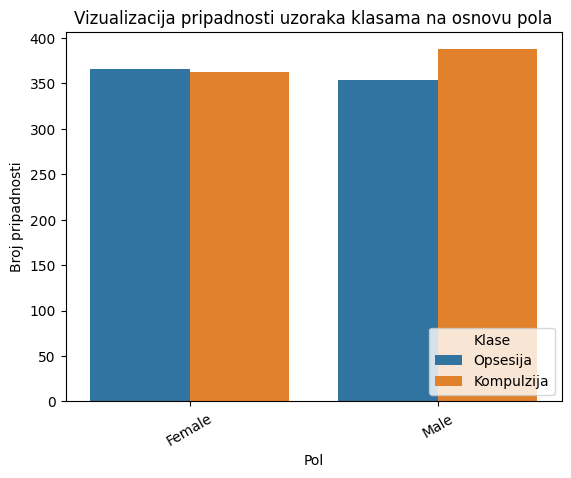

In [ ]:

sns.countplot(data=df, x="Gender", hue="Class")
plt.xticks(rotation=30);
plt.legend(title="Klase", loc="lower right")
plt.xlabel("Pol")
plt.ylabel("Broj pripadnosti")
plt.title("Vizualizacija pripadnosti uzoraka klasama na osnovu pola")



Text(0.5, 1.0, 'Vizualizacija pripadnosti uzoraka klasama na osnovu etničke pripadnosti')

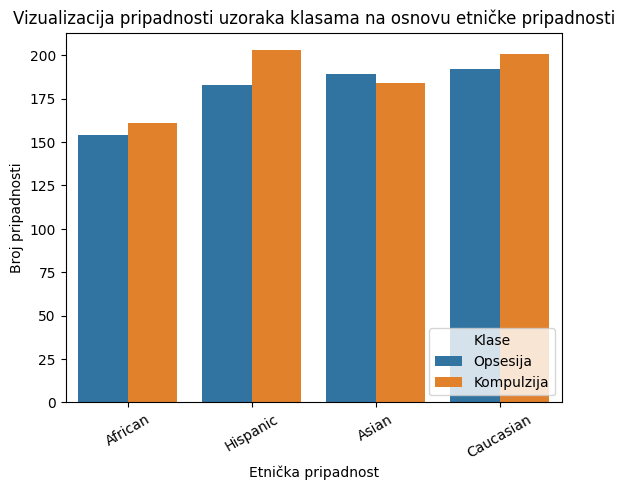

In [ ]:

sns.countplot(data=df, x="Ethnicity", hue="Class")
plt.xticks(rotation=30);
plt.legend(title="Klase", loc="lower right")
plt.xlabel("Etnička pripadnost")
plt.ylabel("Broj pripadnosti")
plt.title("Vizualizacija pripadnosti uzoraka klasama na osnovu etničke pripadnosti")


Text(0.5, 1.0, 'Vizualizacija pripadnosti uzoraka klasama na osnovu bračnog statusa')

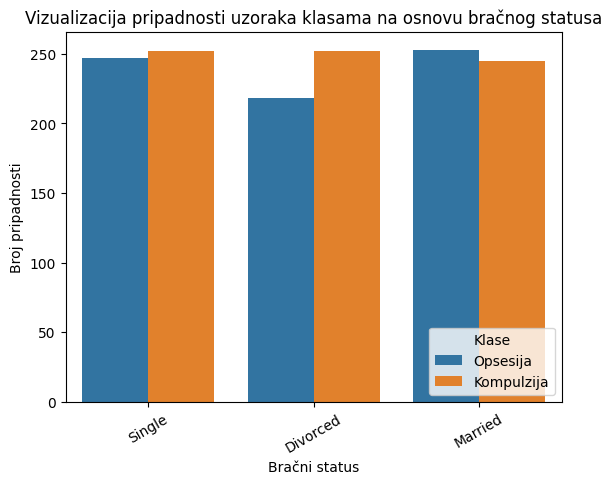

In [ ]:

sns.countplot(data=df, x="Marital Status", hue="Class")
plt.xticks(rotation=30);
plt.legend(title="Klase", loc="lower right")
plt.xlabel("Bračni status")
plt.ylabel("Broj pripadnosti")
plt.title("Vizualizacija pripadnosti uzoraka klasama na osnovu bračnog statusa")


Text(0.5, 1.0, 'Vizualizacija pripadnosti uzoraka klasama na osnovu nioa obrazovanja')

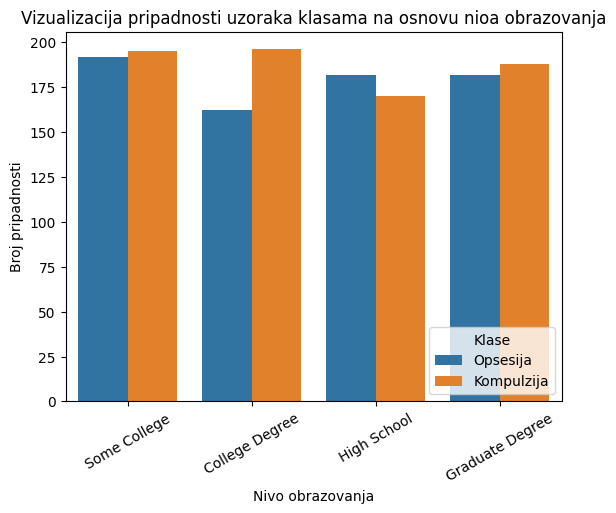

In [ ]:

sns.countplot(data=df, x="Education Level", hue="Class")
plt.xticks(rotation=30);
plt.legend(title="Klase", loc="lower right")
plt.xlabel("Nivo obrazovanja")
plt.ylabel("Broj pripadnosti")
plt.title("Vizualizacija pripadnosti uzoraka klasama na osnovu nioa obrazovanja")


Text(0.5, 1.0, 'Vizualizacija pripadnosti uzoraka klasama na osnovu prethodne dijagnoze')

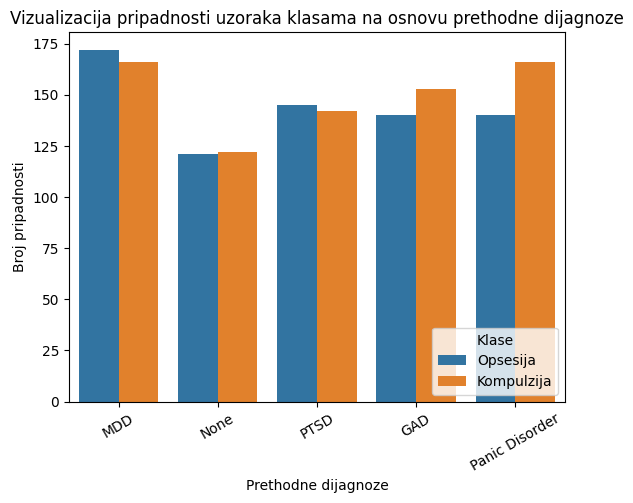

In [ ]:

sns.countplot(data=df, x="Previous Diagnoses", hue="Class")
plt.xticks(rotation=30);
plt.legend(title="Klase", loc="lower right")
plt.xlabel("Prethodne dijagnoze")
plt.ylabel("Broj pripadnosti")
plt.title("Vizualizacija pripadnosti uzoraka klasama na osnovu prethodne dijagnoze")

# Podela na train i test

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['Gender'] = label_encoder.fit_transform(df['Gender'])
#female je 0, male 1


In [ ]:
# Enkodiranje vrednosti u koloni 'Ethnicity'
df['Ethnicity'] = label_encoder.fit_transform(df['Ethnicity'])
df['Marital Status'] = label_encoder.fit_transform(df['Marital Status'])
df['Education Level'] = label_encoder.fit_transform(df['Education Level'])
df['Previous Diagnoses'] = label_encoder.fit_transform(df['Previous Diagnoses'])
df['Family History of OCD'] = label_encoder.fit_transform(df['Family History of OCD'])
df['Obsession Type'] = label_encoder.fit_transform(df['Obsession Type'])
df['Compulsion Type'] = label_encoder.fit_transform(df['Compulsion Type'])
df['Depression Diagnosis'] = label_encoder.fit_transform(df['Depression Diagnosis'])
df['Anxiety Diagnosis'] = label_encoder.fit_transform(df['Anxiety Diagnosis'])
df['Medications'] = label_encoder.fit_transform(df['Medications'])


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Normalizacija 'Duration of Symptoms (months)' na opseg 0-1
df['Duration of Symptoms (months)'] = scaler.fit_transform(df[['Duration of Symptoms (months)']])
df.head()

,Age,Gender,Ethnicity,Marital Status,Education Level,Duration of Symptoms (months),Previous Diagnoses,Family History of OCD,Obsession Type,Compulsion Type,Y-BOCS Score (Obsessions),Y-BOCS Score (Compulsions),Depression Diagnosis,Anxiety Diagnosis,Medications,Class
0,32,0,0,2,3,0.841880,1,0,1,0,17,10,1,1,2,Opsesija
1,69,1,0,0,3,0.743590,2,1,1,4,21,25,1,1,3,Kompulzija
2,57,1,3,0,0,0.713675,1,0,0,0,3,4,0,0,0,Kompulzija
3,27,0,3,1,0,0.512821,3,1,4,4,14,28,1,1,3,Kompulzija
4,56,0,3,1,2,0.692308,3,1,2,2,39,18,0,0,1,Opsesija


In [ ]:
from sklearn.model_selection import train_test_split

# X sadrži ulazne karakteristike, Y sadrži target varijablu (klase)
X = df.drop(columns=['Y-BOCS Score (Obsessions)', 'Y-BOCS Score (Compulsions)', 'Class'])
Y = df['Class']



# Podela podataka na trening i test skupove (90% za trening, 10% za test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=15)


# Prikaz dimenzija trening i test skupova
print("Dimenzije trening skupa:", X_train.shape, Y_train.shape)
print("Dimenzije test skupa:", X_test.shape, Y_test.shape)

Dimenzije trening skupa: (1320, 13) (1320,)
Dimenzije test skupa: (147, 13) (147,)


# Pravljenje modela

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

parameters =  {
    'n_neighbors': [1, 2, 3, 4, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'metric': ['minkowski', 'hamming', 'jaccard', 'dice' 'manhattan']
}
classifier = KNeighborsClassifier()
clf = GridSearchCV(classifier, parameters, scoring='accuracy', cv=5, verbose=3)
clf.fit(X_train, Y_train)


Fitting 5 folds for each of 256 candidates, totalling 1280 fits
[CV 1/5] END algorithm=auto, metric=minkowski, n_neighbors=1, weights=uniform;, score=0.534 total time=   0.0s
[CV 2/5] END algorithm=auto, metric=minkowski, n_neighbors=1, weights=uniform;, score=0.477 total time=   0.0s
[CV 3/5] END algorithm=auto, metric=minkowski, n_neighbors=1, weights=uniform;, score=0.549 total time=   0.0s
[CV 4/5] END algorithm=auto, metric=minkowski, n_neighbors=1, weights=uniform;, score=0.492 total time=   0.0s
[CV 5/5] END algorithm=auto, metric=minkowski, n_neighbors=1, weights=uniform;, score=0.553 total time=   0.0s
[CV 1/5] END algorithm=auto, metric=minkowski, n_neighbors=1, weights=distance;, score=0.534 total time=   0.0s
[CV 2/5] END algorithm=auto, metric=minkowski, n_neighbors=1, weights=distance;, score=0.477 total time=   0.0s
[CV 3/5] END algorithm=auto, metric=minkowski, n_neighbors=1, weights=distance;, score=0.549 total time=   0.0s
[CV 4/5] END algorithm=auto, metric=minkowski

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/me

[CV 3/5] END algorithm=brute, metric=jaccard, n_neighbors=1, weights=uniform;, score=0.515 total time=   0.0s
[CV 4/5] END algorithm=brute, metric=jaccard, n_neighbors=1, weights=uniform;, score=0.439 total time=   0.0s
[CV 5/5] END algorithm=brute, metric=jaccard, n_neighbors=1, weights=uniform;, score=0.470 total time=   0.0s
[CV 1/5] END algorithm=brute, metric=jaccard, n_neighbors=1, weights=distance;, score=0.492 total time=   0.0s
[CV 2/5] END algorithm=brute, metric=jaccard, n_neighbors=1, weights=distance;, score=0.496 total time=   0.0s
[CV 3/5] END algorithm=brute, metric=jaccard, n_neighbors=1, weights=distance;, score=0.515 total time=   0.0s
[CV 4/5] END algorithm=brute, metric=jaccard, n_neighbors=1, weights=distance;, score=0.439 total time=   0.0s
[CV 5/5] END algorithm=brute, metric=jaccard, n_neighbors=1, weights=distance;, score=0.470 total time=   0.0s
[CV 1/5] END algorithm=brute, metric=jaccard, n_neighbors=2, weights=uniform;, score=0.466 total time=   0.0s
[CV 2

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/me

[CV 3/5] END algorithm=brute, metric=jaccard, n_neighbors=2, weights=uniform;, score=0.527 total time=   0.0s
[CV 4/5] END algorithm=brute, metric=jaccard, n_neighbors=2, weights=uniform;, score=0.462 total time=   0.0s
[CV 5/5] END algorithm=brute, metric=jaccard, n_neighbors=2, weights=uniform;, score=0.489 total time=   0.0s
[CV 1/5] END algorithm=brute, metric=jaccard, n_neighbors=2, weights=distance;, score=0.492 total time=   0.0s
[CV 2/5] END algorithm=brute, metric=jaccard, n_neighbors=2, weights=distance;, score=0.519 total time=   0.0s
[CV 3/5] END algorithm=brute, metric=jaccard, n_neighbors=2, weights=distance;, score=0.519 total time=   0.0s
[CV 4/5] END algorithm=brute, metric=jaccard, n_neighbors=2, weights=distance;, score=0.443 total time=   0.0s
[CV 5/5] END algorithm=brute, metric=jaccard, n_neighbors=2, weights=distance;, score=0.489 total time=   0.0s
[CV 1/5] END algorithm=brute, metric=jaccard, n_neighbors=3, weights=uniform;, score=0.481 total time=   0.0s
[CV 2

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/me

[CV 3/5] END algorithm=brute, metric=jaccard, n_neighbors=3, weights=uniform;, score=0.489 total time=   0.0s
[CV 4/5] END algorithm=brute, metric=jaccard, n_neighbors=3, weights=uniform;, score=0.500 total time=   0.0s
[CV 5/5] END algorithm=brute, metric=jaccard, n_neighbors=3, weights=uniform;, score=0.466 total time=   0.0s
[CV 1/5] END algorithm=brute, metric=jaccard, n_neighbors=3, weights=distance;, score=0.492 total time=   0.0s
[CV 2/5] END algorithm=brute, metric=jaccard, n_neighbors=3, weights=distance;, score=0.511 total time=   0.0s
[CV 3/5] END algorithm=brute, metric=jaccard, n_neighbors=3, weights=distance;, score=0.485 total time=   0.0s
[CV 4/5] END algorithm=brute, metric=jaccard, n_neighbors=3, weights=distance;, score=0.489 total time=   0.0s
[CV 5/5] END algorithm=brute, metric=jaccard, n_neighbors=3, weights=distance;, score=0.477 total time=   0.0s
[CV 1/5] END algorithm=brute, metric=jaccard, n_neighbors=4, weights=uniform;, score=0.462 total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/me

[CV 2/5] END algorithm=brute, metric=jaccard, n_neighbors=4, weights=uniform;, score=0.489 total time=   0.0s
[CV 3/5] END algorithm=brute, metric=jaccard, n_neighbors=4, weights=uniform;, score=0.527 total time=   0.0s
[CV 4/5] END algorithm=brute, metric=jaccard, n_neighbors=4, weights=uniform;, score=0.511 total time=   0.0s
[CV 5/5] END algorithm=brute, metric=jaccard, n_neighbors=4, weights=uniform;, score=0.496 total time=   0.0s
[CV 1/5] END algorithm=brute, metric=jaccard, n_neighbors=4, weights=distance;, score=0.477 total time=   0.0s
[CV 2/5] END algorithm=brute, metric=jaccard, n_neighbors=4, weights=distance;, score=0.492 total time=   0.0s
[CV 3/5] END algorithm=brute, metric=jaccard, n_neighbors=4, weights=distance;, score=0.523 total time=   0.0s
[CV 4/5] END algorithm=brute, metric=jaccard, n_neighbors=4, weights=distance;, score=0.481 total time=   0.0s
[CV 5/5] END algorithm=brute, metric=jaccard, n_neighbors=4, weights=distance;, score=0.477 total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/me

[CV 1/5] END algorithm=brute, metric=jaccard, n_neighbors=5, weights=uniform;, score=0.458 total time=   0.0s
[CV 2/5] END algorithm=brute, metric=jaccard, n_neighbors=5, weights=uniform;, score=0.477 total time=   0.0s
[CV 3/5] END algorithm=brute, metric=jaccard, n_neighbors=5, weights=uniform;, score=0.572 total time=   0.0s
[CV 4/5] END algorithm=brute, metric=jaccard, n_neighbors=5, weights=uniform;, score=0.489 total time=   0.0s
[CV 5/5] END algorithm=brute, metric=jaccard, n_neighbors=5, weights=uniform;, score=0.489 total time=   0.0s
[CV 1/5] END algorithm=brute, metric=jaccard, n_neighbors=5, weights=distance;, score=0.473 total time=   0.0s
[CV 2/5] END algorithm=brute, metric=jaccard, n_neighbors=5, weights=distance;, score=0.489 total time=   0.0s
[CV 3/5] END algorithm=brute, metric=jaccard, n_neighbors=5, weights=distance;, score=0.530 total time=   0.0s
[CV 4/5] END algorithm=brute, metric=jaccard, n_neighbors=5, weights=distance;, score=0.489 total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/me

[CV 5/5] END algorithm=brute, metric=jaccard, n_neighbors=5, weights=distance;, score=0.492 total time=   0.0s
[CV 1/5] END algorithm=brute, metric=jaccard, n_neighbors=7, weights=uniform;, score=0.473 total time=   0.0s
[CV 2/5] END algorithm=brute, metric=jaccard, n_neighbors=7, weights=uniform;, score=0.534 total time=   0.0s
[CV 3/5] END algorithm=brute, metric=jaccard, n_neighbors=7, weights=uniform;, score=0.500 total time=   0.0s
[CV 4/5] END algorithm=brute, metric=jaccard, n_neighbors=7, weights=uniform;, score=0.496 total time=   0.0s
[CV 5/5] END algorithm=brute, metric=jaccard, n_neighbors=7, weights=uniform;, score=0.504 total time=   0.0s
[CV 1/5] END algorithm=brute, metric=jaccard, n_neighbors=7, weights=distance;, score=0.481 total time=   0.0s
[CV 2/5] END algorithm=brute, metric=jaccard, n_neighbors=7, weights=distance;, score=0.508 total time=   0.0s
[CV 3/5] END algorithm=brute, metric=jaccard, n_neighbors=7, weights=distance;, score=0.492 total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/me

[CV 4/5] END algorithm=brute, metric=jaccard, n_neighbors=7, weights=distance;, score=0.477 total time=   0.0s
[CV 5/5] END algorithm=brute, metric=jaccard, n_neighbors=7, weights=distance;, score=0.500 total time=   0.0s
[CV 1/5] END algorithm=brute, metric=jaccard, n_neighbors=9, weights=uniform;, score=0.481 total time=   0.0s
[CV 2/5] END algorithm=brute, metric=jaccard, n_neighbors=9, weights=uniform;, score=0.538 total time=   0.0s
[CV 3/5] END algorithm=brute, metric=jaccard, n_neighbors=9, weights=uniform;, score=0.523 total time=   0.0s
[CV 4/5] END algorithm=brute, metric=jaccard, n_neighbors=9, weights=uniform;, score=0.504 total time=   0.0s
[CV 5/5] END algorithm=brute, metric=jaccard, n_neighbors=9, weights=uniform;, score=0.492 total time=   0.0s
[CV 1/5] END algorithm=brute, metric=jaccard, n_neighbors=9, weights=distance;, score=0.496 total time=   0.0s
[CV 2/5] END algorithm=brute, metric=jaccard, n_neighbors=9, weights=distance;, score=0.504 total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/me

[CV 3/5] END algorithm=brute, metric=jaccard, n_neighbors=9, weights=distance;, score=0.511 total time=   0.0s
[CV 4/5] END algorithm=brute, metric=jaccard, n_neighbors=9, weights=distance;, score=0.485 total time=   0.0s
[CV 5/5] END algorithm=brute, metric=jaccard, n_neighbors=9, weights=distance;, score=0.500 total time=   0.0s
[CV 1/5] END algorithm=brute, metric=jaccard, n_neighbors=11, weights=uniform;, score=0.477 total time=   0.0s
[CV 2/5] END algorithm=brute, metric=jaccard, n_neighbors=11, weights=uniform;, score=0.523 total time=   0.0s
[CV 3/5] END algorithm=brute, metric=jaccard, n_neighbors=11, weights=uniform;, score=0.519 total time=   0.0s
[CV 4/5] END algorithm=brute, metric=jaccard, n_neighbors=11, weights=uniform;, score=0.496 total time=   0.0s
[CV 5/5] END algorithm=brute, metric=jaccard, n_neighbors=11, weights=uniform;, score=0.470 total time=   0.0s
[CV 1/5] END algorithm=brute, metric=jaccard, n_neighbors=11, weights=distance;, score=0.489 total time=   0.0s


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/pairwise.py:2025: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/me

[CV 2/5] END algorithm=brute, metric=jaccard, n_neighbors=11, weights=distance;, score=0.504 total time=   0.0s
[CV 3/5] END algorithm=brute, metric=jaccard, n_neighbors=11, weights=distance;, score=0.523 total time=   0.0s
[CV 4/5] END algorithm=brute, metric=jaccard, n_neighbors=11, weights=distance;, score=0.489 total time=   0.0s
[CV 5/5] END algorithm=brute, metric=jaccard, n_neighbors=11, weights=distance;, score=0.500 total time=   0.0s
[CV 1/5] END algorithm=brute, metric=dicemanhattan, n_neighbors=1, weights=uniform;, score=nan total time=   0.0s
[CV 2/5] END algorithm=brute, metric=dicemanhattan, n_neighbors=1, weights=uniform;, score=nan total time=   0.0s
[CV 3/5] END algorithm=brute, metric=dicemanhattan, n_neighbors=1, weights=uniform;, score=nan total time=   0.0s
[CV 4/5] END algorithm=brute, metric=dicemanhattan, n_neighbors=1, weights=uniform;, score=nan total time=   0.0s
[CV 5/5] END algorithm=brute, metric=dicemanhattan, n_neighbors=1, weights=uniform;, score=nan t

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
480 fits failed out of a total of 1280.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
320 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py", line 213, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'metric': ['minkowski', 'hamming', 'jaccard',
                                    'dicemanhattan'],
                         'n_neighbors': [1, 2, 3, 4, 5, 7, 9, 11],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=3)

In [ ]:
print("Najbolji parametri:")
print(clf.best_params_)

print("Tačnost na trening skupu sa najboljim parametrima:", clf.best_score_)


Najbolji parametri:
{'algorithm': 'auto', 'metric': 'minkowski', 'n_neighbors': 5, 'weights': 'distance'}
Tačnost na trening skupu sa najboljim parametrima: 0.5227272727272727


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']  # Dodate različite mere čistoće čvora
}

rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

grid_search.fit(X_train, Y_train)

best_rf = grid_search.best_estimator_

print("Najbolji skor:", grid_search.best_score_)
print("Najbolji hiperparametri:", grid_search.best_params_)


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Najbolji skor: 0.5378787878787878
Najbolji hiperparametri: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 500}


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV


param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['poly'],
    'degree': [2, 3, 4, 5]  # Dodati različiti stepeni polinoma
}


svc = SVC()


grid_search = GridSearchCV(estimator=svc, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy')


grid_search.fit(X_train, Y_train)

best_svc = grid_search.best_estimator_

print("Najbolji skor:", grid_search.best_score_)
print("Najbolji hiperparametri:", grid_search.best_params_)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Najbolji skor: 0.5204545454545455
Najbolji hiperparametri: {'C': 10, 'degree': 5, 'kernel': 'poly'}


# Smanjenje dimenzionalnosti

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
s = StandardScaler()
s.fit(X_train)
X_train_std = s.transform(X_train)
X_test_std = s.transform(X_test)
pca = PCA(n_components =0.95)
pca.fit (X_train)
X_train_r = pca.transform (X_train)
X_test_r = pca.transform(X_test)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_params = {'algorithm': 'auto', 'metric': 'minkowski', 'n_neighbors': 2, 'weights': 'uniform'}
knn_model = KNeighborsClassifier(**knn_params)
knn_model.fit(X_train_r, Y_train)

accuracy = knn_model.score(X_test_r, Y_test)

print(f"Tačnost modela: {accuracy}")


Tačnost modela: 0.5102040816326531


# Mere uspešnosti klasifikatora

Na osnovu konačnog modela, kojeg smo odredili na osnovu dobijenih tačnosti, određujemo konačne mere tačnosti. Mere uspešnosti za probleme klasifikacije se određuju na osnovu matrica konfuzije.

In [ ]:
from sklearn.metrics import confusion_matrix

Y_pred = knn_model.predict(X_test_r)
conf_mat = confusion_matrix(Y_test, Y_pred)
print(conf_mat)


[[62 20]
 [52 13]]


Kako se bavimo binarnom klasifikacijom, matrica konfuzije je u ovom slučaju binarna. Ona se sastoji od vrednosti koje opisuju odgovarajuće parametre: TP (*true positive*, stvarni pozitivi), TN (*true negative*, stvarni negativi), FP (*false positive*, lažni pozitivi), FN (*false negative*, lažni negativi). TP je broj uzoraka čije su stvarna i prediktivna vrednost pozitivne klase iste. TN je broj uzoraka čije su stvarna i prediktivna vrednost druge (negativne) klase iste. FP je broj uzoraka koji su se našli u negativnoj grupi, a zapravo su iz pozitivne, dok parametar FN opisuje suprotni slučaj.

In [ ]:
TN=conf_mat[0,0]
FP=conf_mat[0,1]
FN=conf_mat[1,0]
TP=conf_mat[1,1]
print('Stvarni negativi, TN: ', TN)
print('Stvarni pozitivi, TP: ', TP)
print('Lažni negativi, FN: ', FN)
print('Lažni pozitivi, FP: ', FP)

Stvarni negativi, TN:  62
Stvarni pozitivi, TP:  13
Lažni negativi, FN:  52
Lažni pozitivi, FP:  20


Pomoću ovih parametara možemo izračunati mere uspešnosti klasifikatora: tačnost, preciznost, osetljivost, specifičnost, F-mera. Formulacije i vrednosti datih parametara uspešnosti su dati u narednoj programskoj ćeliji:

In [ ]:
preciznost = TP/(TP+FP)
tacnost = (TP+TN)/(TP+TN+FP+FN)
osetljivost = TP/(TP+FN)
specificnost = TN/(TN+FP)
f_mera = 2*preciznost*osetljivost/(preciznost+osetljivost)
print('Preciznost: ', preciznost)
print('Tačnost: ', tacnost)
print('Osetljivost: ', osetljivost)
print('F mera: ', f_mera)
print('Specifičnost: ', specificnost)

Preciznost:  0.3939393939393939
Tačnost:  0.5102040816326531
Osetljivost:  0.2
F mera:  0.2653061224489796
Specifičnost:  0.7560975609756098


ROC kriva prestavlja zavisnost osetljivosti (TPR) i stope lažnih pozitiva (FPR). Površina ispod krive AUC nam govori o uspešnosti klasifikatora. Za ovaj problem klasifikacije površina ispod AUC krive što se može videti na grafiku ispod, je jednaka 0.56.

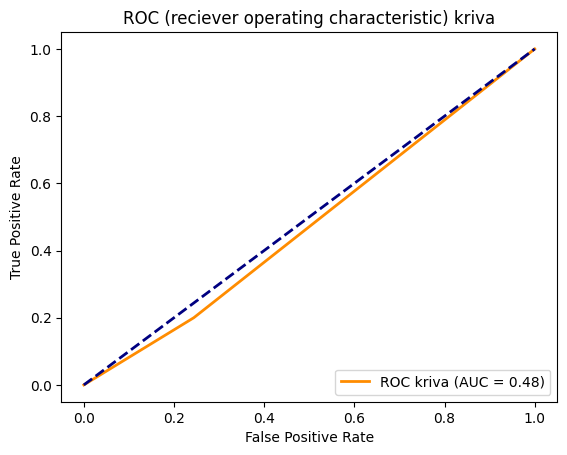

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

y_test_binary = [1 if label == 'Opsesija' else 0 for label in Y_test]
y_pred_binary = [1 if label == 'Opsesija' else 0 for label in Y_pred]

fpr, tpr, _ = roc_curve(y_test_binary, y_pred_binary)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC kriva (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC (reciever operating characteristic) kriva')
plt.legend(loc='lower right')
plt.show()



# Prikaz rezultata uspešnosti klasifikacije koristeći prve dve i prve tri PCA komponente

In [ ]:
# Broj dimenzija
num_dimensions = pca.n_components_

# Udeo varijance objašnjen u svakoj komponenti
explained_variance_ratio = pca.explained_variance_ratio_

# Ispisivanje rezultata
print("Broj dimenzija:", num_dimensions)
print("Udeo varijance objašnjen u svakoj komponenti:", explained_variance_ratio)

Broj dimenzija: 1
Udeo varijance objašnjen u svakoj komponenti: [0.9613874]


/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/misc.py:424: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(x[0], x[-1])


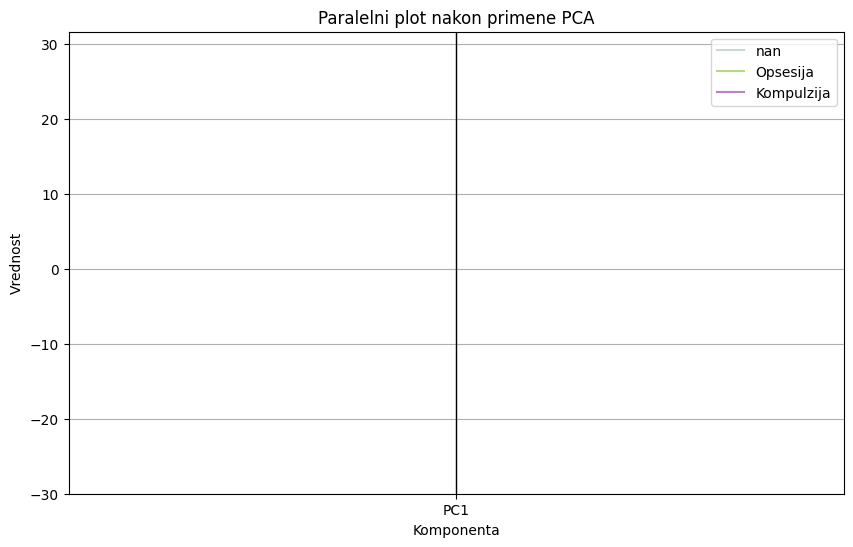

In [ ]:
#ovo nikako!!!! ali nek stoji za sada ahahahah

df_pca = pd.DataFrame(X_test_r, columns=[f'PC{i+1}' for i in range(X_test_r.shape[1])])
df_pca['Class'] = Y_test

# Paralelni plot
plt.figure(figsize=(10, 6))
pd.plotting.parallel_coordinates(df_pca, 'Class', alpha=0.5)
plt.title('Paralelni plot nakon primene PCA')
plt.xlabel('Komponenta')
plt.ylabel('Vrednost')
plt.show()

In [ ]:
X_test_2d = X_test_r[:, :2]
class_mapping = {label: idx for idx, label in enumerate(np.unique(Y_test))}
y_test_numeric = np.array([class_mapping[label] for label in Y_test])

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(X_test_2d[y_test_numeric == 0, 0], X_test_2d[y_test_numeric == 0, 1], color='purple', label='Kompulzija')
plt.scatter(X_test_2d[y_test_numeric == 1, 0], X_test_2d[y_test_numeric == 1, 1], color='yellow', label='Opsesija')
plt.scatter(X_test_r[Y_pred != Y_test, 0], X_test_r[Y_pred != Y_test, 1], color='r', label='Neispravno predviđeno', marker='x')
plt.title('Scatter plot prve dve PCA komponente')
plt.xlabel('Prva PCA komponenta')
plt.ylabel('Druga PCA komponenta')
plt.legend()
plt.show()

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# Priprema podataka
X_test_3d = X_test_r[:, :3]

# Scatter plot
plt.figure(figsize=(10, 6))
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(X_test_3d[y_test_numeric == 0, 0], X_test_3d[y_test_numeric == 0, 1], X_test_3d[y_test_numeric == 0, 2], c='purple', label='Kompulzija')
ax.scatter(X_test_3d[y_test_numeric == 1, 0], X_test_3d[y_test_numeric == 1, 1], X_test_3d[y_test_numeric == 1, 2], c='yellow', label='Opsesija')
ax.scatter(X_test_r[Y_pred != Y_test, 0], X_test_r[Y_pred != Y_test, 1], X_test_r[Y_pred != Y_test, 2], color='r', label='Neispravno predviđeno', marker='x')
ax.set_title('Scatter plot prve tri PCA komponente')
ax.set_xlabel('Prva PCA komponenta')
ax.set_ylabel('Druga PCA komponenta')
ax.set_zlabel('Treća PCA komponenta')
ax.legend()
plt.show()

Kao što se može primetiti uzorci nisu odvojivi po klasnoj pripadnosti, jer nam PCA komponente nemaju veliku varijansu, a za PCA se biraju pravci najveće varijanse. Zarad lakšeg prikaza smo koristili prve dve i prve tri PCA komponente koje imaju najveću varijansu. Nismo prelazili u veće prostore po pogledu dimanzija, jer čovek ne može sa lakoćom da razume i zamisli prostore dimenzionalnosti veće od 3.
